# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

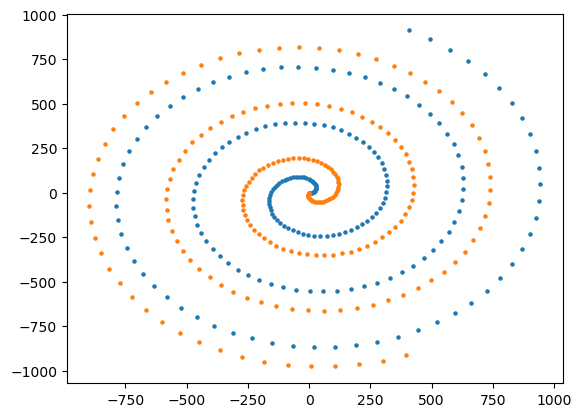

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = pd.concat([df1, df2])
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

In [5]:
display(df.shape)
df.head()

(401, 3)

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0


Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In order to replicate the results obtained in Tensorflow Playground, I need to add more inputs

In [114]:
df['X_squared'] = df['X'] ** 2
df['Y_squared'] = df['Y'] ** 2
df['X*Y'] = df['X'] * df['Y']
df['sin(X)'] = np.sin(df['X'])
df['sin(Y)'] = np.sin(df['Y'])
display(df.head())

,X,Y,CLASS,X_squared,Y_squared,X*Y,sin(X),sin(Y)
0,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000
1,4.975,0.499,0,24.751,0.249,2.483,-0.966,0.479
2,9.801,1.987,0,96.053,3.947,19.471,-0.367,0.915
3,14.330,4.433,0,205.350,19.650,63.522,0.981,-0.961
4,18.421,7.788,0,339.341,60.659,143.471,-0.415,0.998


## No transformation
### Train-test split

In [115]:
X = df.drop(columns=['CLASS'])
y = df['CLASS']
display(X.head())
display(y.head())

,X,Y,X_squared,Y_squared,X*Y,sin(X),sin(Y)
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,4.975,0.499,24.751,0.249,2.483,-0.966,0.479
2,9.801,1.987,96.053,3.947,19.471,-0.367,0.915
3,14.330,4.433,205.350,19.650,63.522,0.981,-0.961
4,18.421,7.788,339.341,60.659,143.471,-0.415,0.998


0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

In [116]:
X.describe()

,X,Y,X_squared,Y_squared,X*Y,sin(X),sin(Y)
count,401.000,401.000,401.000,401.000,401.000,401.000,401.000
mean,1.505,-19.031,165142.784,167363.450,8355.157,0.026,-0.030
std,406.883,409.168,214776.775,219918.025,158041.918,0.727,0.708
min,-897.146,-974.962,0.000,0.000,-408460.777,-1.000,-1.000
25%,-253.905,-270.132,10886.362,8081.742,-55697.167,-0.701,-0.727
50%,5.305,1.887,68449.182,63095.786,38.637,0.027,-0.075
75%,273.973,233.401,243965.067,251007.988,60969.868,0.800,0.712
max,943.798,912.945,890754.531,950550.269,481013.292,1.000,1.000


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [150]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([137, 143], dtype=int64))

In [151]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([64, 57], dtype=int64))

### Model1

In [118]:

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network. # Dense: to create hidden layers # Dropout: minimize overfitting
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases (if tends to overfitting)
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model (create checkpoints: it's a temp file that stores the neural network - just in case there's a problem so you don't have to start form scratch)

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

2.12.0


In [126]:
early_stopping = EarlyStopping(patience=15)

model1 = keras.Sequential()

model1.add(Dense(units = 7,input_dim = X_train.shape[1],activation='relu'))

# Adding a dropout layer with a 0.2 regularization parameter (it must be between [0,1) )
# percentage of the previous layer that are going to be switch off randomly
model1.add(Dropout(0.01))
model1.add(Dense(units = 3, activation='relu'))

# The activation function for the input and hidden layers is 'relu', a popular activation function with good performance. 
# The output activation function is 'sigmoid', which is used for binary classification.
model1.add(Dense(1, activation='sigmoid'))

In [127]:
#Compile model
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 7)                 56        
                                                                 
 dropout_10 (Dropout)        (None, 7)                 0         
                                                                 
 dense_33 (Dense)            (None, 3)                 24        
                                                                 
 dense_34 (Dense)            (None, 1)                 4         
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [121]:
checkpoint_path = 'class-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [128]:
history = model1.fit(
    X_train, 
    y_train, 
    epochs=155, # Number of epochs. This value is det by trial an error
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV. Observations are place randomly if we don't fix the randome_state
    # also the starting the coefficients are started at random values
    batch_size=11, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/155

Epoch 1: saving model to class-nn2.hdf5
21/21 - 1s - loss: 1774.8708 - accuracy: 0.5357 - val_loss: 160.0820 - val_accuracy: 0.4821 - 1s/epoch - 60ms/step
Epoch 2/155

Epoch 2: saving model to class-nn2.hdf5
21/21 - 0s - loss: 687.5495 - accuracy: 0.5045 - val_loss: 34.9313 - val_accuracy: 0.4643 - 103ms/epoch - 5ms/step
Epoch 3/155

Epoch 3: saving model to class-nn2.hdf5
21/21 - 0s - loss: 289.3338 - accuracy: 0.5357 - val_loss: 18.2289 - val_accuracy: 0.4643 - 115ms/epoch - 5ms/step
Epoch 4/155

Epoch 4: saving model to class-nn2.hdf5
21/21 - 0s - loss: 127.9103 - accuracy: 0.4955 - val_loss: 7.6791 - val_accuracy: 0.4821 - 102ms/epoch - 5ms/step
Epoch 5/155

Epoch 5: saving model to class-nn2.hdf5
21/21 - 0s - loss: 28.5704 - accuracy: 0.5179 - val_loss: 0.8446 - val_accuracy: 0.4821 - 101ms/epoch - 5ms/step
Epoch 6/155

Epoch 6: saving model to class-nn2.hdf5
21/21 - 0s - loss: 1.2114 - accuracy: 0.4821 - val_loss: 0.9663 - val_accuracy: 0.4821 - 84ms/epoch - 4ms/step

In [18]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [123]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [129]:
history.history['loss'][-2]

0.7936972975730896

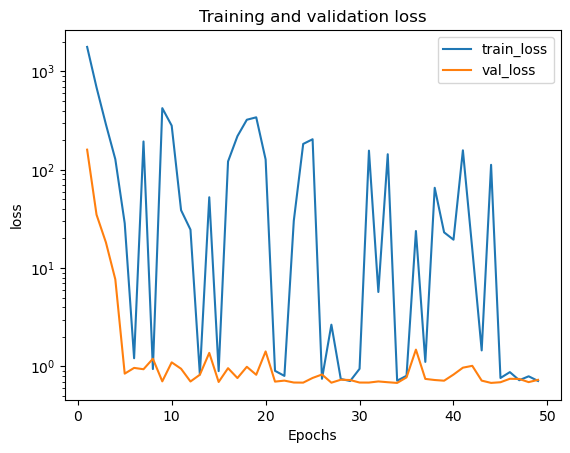

In [130]:
plot_metric(history,'loss')

## Predictions and error metrics

In [25]:
# define function for computing the error metrics
from sklearn.metrics import recall_score, precision_score, cohen_kappa_score

def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test, y_pred_test)

    precision_train = precision_score(y_train,y_pred_train)
    precision_test  = precision_score(y_test,y_pred_test)

    kappa_train = cohen_kappa_score(y_train,y_pred_train)
    kappa_test  = cohen_kappa_score(y_test,y_pred_test)

    #R2_train = r2_score(y_train,y_pred_train)
    #R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Precision','Recall','Kappa'],
                            'Train': [precision_train, recall_train, kappa_train],
                            'Test' : [precision_test , recall_test, kappa_test]})

    pd.options.display.float_format = '{:.3f}'.format

    df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_pred_train}) # .tolist()
    df_test  = pd.DataFrame({'Real': y_test.tolist(),  'Predicted': y_pred_test}) # .tolist()

    return performance, df_train, df_test

In [131]:
y_pred_train_nn1 = model1.predict(X_train)
y_pred_test_nn1  = model1.predict(X_test)

y_train = np.array(y_train).reshape(-1,1) # (nrows,) ->(nrows,1)
y_test  = np.array(y_test).reshape(-1,1)

4/4 [==============================] - 0s 3ms/step


In [152]:
y_pred_train_nn1

array([[0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.83441937],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.72903556],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.81106055],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.51793003],
       [0.51146364],
       [0.5089751 ],
       [0.6547912 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.508

In [132]:
y_pred_train_nn1_bi =  [1 if i>0.5 else 0 for i in y_pred_train_nn1]
y_pred_test_nn1_bi = [1 if i>0.5 else 0 for i in y_pred_test_nn1]

In [133]:
results, df1, df2 = model_performance(y_train, y_pred_train_nn1_bi, y_test, y_pred_test_nn1_bi)
results

,Error_metric,Train,Test
0,Precision,0.511,0.471
1,Recall,1.000,1.000
2,Kappa,0.000,0.000


In [134]:
# Check the model performance
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_nn1_bi))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.47      1.00      0.64        57

    accuracy                           0.47       121
   macro avg       0.24      0.50      0.32       121
weighted avg       0.22      0.47      0.30       121



## Scaling the data

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train) # This will obtain the mean and the sd of each column

X_train_stand = scaler.transform(X_train) # Applies the transformation
X_train_stand = pd.DataFrame(X_train_stand,columns=X_train.columns)
display(X_train_stand.head())

X_test_stand = scaler.transform(X_test)
X_test_stand  = pd.DataFrame(X_test_stand, columns=X_test.columns)
display(X_test_stand.head())

,X,Y,X_squared,Y_squared,X*Y,sin(X),sin(Y)
0,-0.107,1.988,-0.752,2.092,-0.229,0.630,1.182
1,-0.109,-0.721,-0.752,-0.298,0.063,1.322,1.314
2,-0.960,-1.677,-0.067,1.599,1.729,0.673,1.182
3,-0.018,-1.476,-0.760,1.083,-0.003,1.137,-0.346
4,2.139,-0.673,2.733,-0.355,-1.696,1.215,-0.688


,X,Y,X_squared,Y_squared,X*Y,sin(X),sin(Y)
0,-1.942,0.084,2.090,-0.786,-0.053,0.513,-0.050
1,-0.148,0.996,-0.744,-0.114,-0.164,-1.438,-0.142
2,1.044,-0.889,0.076,-0.067,-1.080,-1.176,-0.989
3,0.062,0.168,-0.756,-0.778,-0.017,1.263,-1.335
4,0.535,0.739,-0.538,-0.436,0.356,-1.146,0.227


In [136]:
X_train_stand.describe()

,X,Y,X_squared,Y_squared,X*Y,sin(X),sin(Y)
count,280.000,280.000,280.000,280.000,280.000,280.000,280.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.218,-2.212,-0.760,-0.786,-2.463,-1.442,-1.415
25%,-0.637,-0.576,-0.709,-0.751,-0.409,-0.971,-1.030
50%,0.027,0.045,-0.437,-0.490,-0.023,-0.031,0.018
75%,0.670,0.618,0.312,0.424,0.345,1.036,1.026
max,2.324,2.208,3.360,3.287,2.898,1.329,1.406


### Model2

In [137]:
early_stopping = EarlyStopping(patience=15)

model2 = keras.Sequential()

model2.add(Dense(units = 7,input_dim = X_train_stand.shape[1],activation='relu'))

# Adding a dropout layer with a 0.2 regularization parameter (it must be between [0,1) )
# percentage of the previous layer that are going to be switch off randomly
model2.add(Dropout(0.01))
model2.add(Dense(units = 3, activation='relu'))

# The activation function for the input and hidden layers is 'relu', a popular activation function with good performance. 
# The output activation function is 'sigmoid', which is used for binary classification.
model2.add(Dense(1, activation='sigmoid'))

#Compile model
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 7)                 56        
                                                                 
 dropout_11 (Dropout)        (None, 7)                 0         
                                                                 
 dense_36 (Dense)            (None, 3)                 24        
                                                                 
 dense_37 (Dense)            (None, 1)                 4         
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [138]:
checkpoint_path = 'class-nn3.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [139]:
history = model2.fit(
    X_train_stand, 
    y_train, 
    epochs=150, # Number of epochs. This value is det by trial an error
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV. Observations are place randomly if we don't fix the randome_state
    # also the starting the coefficients are started at random values
    batch_size=11, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/150

Epoch 1: saving model to class-nn3.hdf5
21/21 - 1s - loss: 0.7018 - accuracy: 0.5134 - val_loss: 0.6744 - val_accuracy: 0.5893 - 1s/epoch - 55ms/step
Epoch 2/150

Epoch 2: saving model to class-nn3.hdf5
21/21 - 0s - loss: 0.6993 - accuracy: 0.5312 - val_loss: 0.6739 - val_accuracy: 0.6250 - 150ms/epoch - 7ms/step
Epoch 3/150

Epoch 3: saving model to class-nn3.hdf5
21/21 - 0s - loss: 0.6953 - accuracy: 0.5402 - val_loss: 0.6733 - val_accuracy: 0.6071 - 120ms/epoch - 6ms/step
Epoch 4/150

Epoch 4: saving model to class-nn3.hdf5
21/21 - 0s - loss: 0.6922 - accuracy: 0.5536 - val_loss: 0.6735 - val_accuracy: 0.6071 - 106ms/epoch - 5ms/step
Epoch 5/150

Epoch 5: saving model to class-nn3.hdf5
21/21 - 0s - loss: 0.6925 - accuracy: 0.5670 - val_loss: 0.6732 - val_accuracy: 0.5893 - 103ms/epoch - 5ms/step
Epoch 6/150

Epoch 6: saving model to class-nn3.hdf5
21/21 - 0s - loss: 0.6894 - accuracy: 0.5491 - val_loss: 0.6729 - val_accuracy: 0.5714 - 102ms/epoch - 5ms/step
Epoch 7/150


In [140]:
history.history['loss'][-2]

0.665969967842102

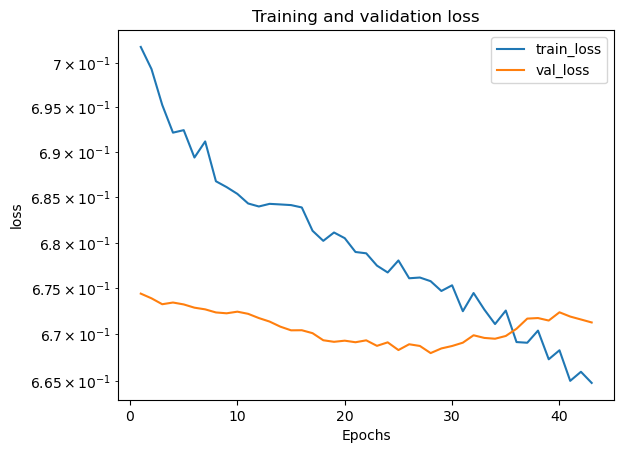

In [141]:
plot_metric(history,'loss')

#### Predictions

In [142]:
y_pred_train_nn2 = model1.predict(X_train_stand)
y_pred_test_nn2  = model1.predict(X_test_stand)

y_train = np.array(y_train).reshape(-1,1) # (nrows,) ->(nrows,1)
y_test  = np.array(y_test).reshape(-1,1)

4/4 [==============================] - 0s 1ms/step


In [143]:
y_pred_test_nn2

array([[0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5165775 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.52148676],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5204757 ],
       [0.5089751 ],
       [0.5893633 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5183243 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.5089751 ],
       [0.52717054],
       [0.5089751 ],
       [0.508

In [144]:
y_pred_train_nn2_bi =  [1 if i>0.5 else 0 for i in y_pred_train_nn2]
y_pred_test_nn2_bi = [1 if i>0.5 else 0 for i in y_pred_test_nn2]

#### Model performance

In [145]:
results2, df3, df4 = model_performance(y_train, y_pred_train_nn2_bi, y_test, y_pred_test_nn2_bi)
results2

,Error_metric,Train,Test
0,Precision,0.511,0.471
1,Recall,1.000,1.000
2,Kappa,0.000,0.000


In [146]:
df3['Predicted'].value_counts()

1    280
Name: Predicted, dtype: int64

In [147]:
print(classification_report(y_test, y_pred_test_nn2_bi))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.47      1.00      0.64        57

    accuracy                           0.47       121
   macro avg       0.24      0.50      0.32       121
weighted avg       0.22      0.47      0.30       121



## PowerTranformer

In [148]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer()
trans.fit(X_train)

X_train_trans = trans.transform(X_train)
X_test_trans  = trans.transform(X_test)

X_train = pd.DataFrame(X_train_trans, columns = X_train.columns)
X_test  = pd.DataFrame(X_test_trans,  columns = X_test.columns)

In [161]:
X_train.describe()

,X,Y,X_squared,Y_squared,X*Y,sin(X),sin(Y)
count,280.000,280.000,280.000,280.000,280.000,280.000,280.000
mean,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.168,-2.162,-2.106,-2.136,-2.510,-1.433,-1.404
25%,-0.643,-0.584,-0.681,-0.831,-0.402,-0.971,-1.029
50%,0.005,0.021,0.092,0.021,-0.008,-0.040,0.005
75%,0.665,0.610,0.776,0.830,0.354,1.037,1.028
max,2.378,2.265,1.775,1.741,2.846,1.336,1.418


## Model3

In [200]:
early_stopping = EarlyStopping(patience=15)

model3 = keras.Sequential()

model3.add(Dense(units = 7,input_dim = X_train.shape[1],activation='relu'))

# Adding a dropout layer with a 0.2 regularization parameter (it must be between [0,1) )
# percentage of the previous layer that are going to be switch off randomly
model3.add(Dropout(0.01))
model3.add(Dense(units = 3, activation='relu'))
#model3.add(Dense(units = 7, activation='relu'))

# The activation function for the input and hidden layers is 'relu', a popular activation function with good performance. 
# The output activation function is 'sigmoid', which is used for binary classification.
model3.add(Dense(1, activation='sigmoid'))

#Compile model
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 7)                 56        
                                                                 
 dropout_24 (Dropout)        (None, 7)                 0         
                                                                 
 dense_84 (Dense)            (None, 3)                 24        
                                                                 
 dense_85 (Dense)            (None, 1)                 4         
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [154]:
checkpoint_path = 'class-nn4.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [201]:
history3 = model3.fit(
    X_train, 
    y_train, 
    epochs=80, # Number of epochs. This value is det by trial an error
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV. Observations are place randomly if we don't fix the randome_state
    # also the starting the coefficients are started at random values
    batch_size=30, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/80

Epoch 1: saving model to class-nn4.hdf5
8/8 - 1s - loss: 0.8102 - accuracy: 0.5312 - val_loss: 0.7612 - val_accuracy: 0.5536 - 1s/epoch - 127ms/step
Epoch 2/80

Epoch 2: saving model to class-nn4.hdf5
8/8 - 0s - loss: 0.7814 - accuracy: 0.5357 - val_loss: 0.7516 - val_accuracy: 0.5536 - 107ms/epoch - 13ms/step
Epoch 3/80

Epoch 3: saving model to class-nn4.hdf5
8/8 - 0s - loss: 0.7834 - accuracy: 0.5312 - val_loss: 0.7419 - val_accuracy: 0.5536 - 81ms/epoch - 10ms/step
Epoch 4/80

Epoch 4: saving model to class-nn4.hdf5
8/8 - 0s - loss: 0.7657 - accuracy: 0.5268 - val_loss: 0.7328 - val_accuracy: 0.5714 - 83ms/epoch - 10ms/step
Epoch 5/80

Epoch 5: saving model to class-nn4.hdf5
8/8 - 0s - loss: 0.7655 - accuracy: 0.5134 - val_loss: 0.7253 - val_accuracy: 0.5714 - 80ms/epoch - 10ms/step
Epoch 6/80

Epoch 6: saving model to class-nn4.hdf5
8/8 - 0s - loss: 0.7502 - accuracy: 0.5179 - val_loss: 0.7189 - val_accuracy: 0.5893 - 78ms/epoch - 10ms/step
Epoch 7/80

Epoch 7: saving 

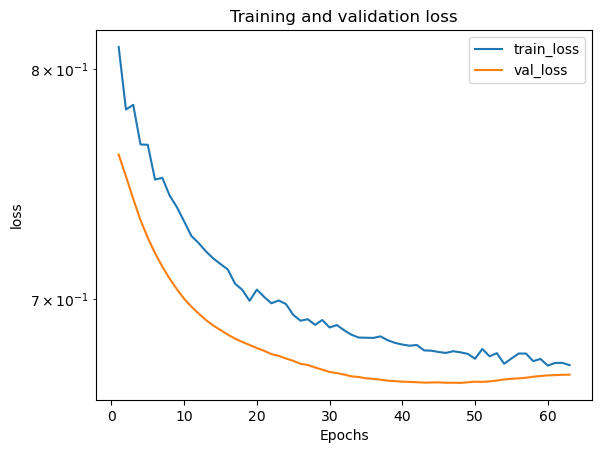

In [202]:
plot_metric(history3,'loss')

### Predictions

In [203]:
y_pred_train_nn3 = model1.predict(X_train)
y_pred_test_nn3  = model1.predict(X_test)

y_train = np.array(y_train).reshape(-1,1) # (nrows,) ->(nrows,1)
y_test  = np.array(y_test).reshape(-1,1)

4/4 [==============================] - 0s 2ms/step


In [204]:
y_pred_train_nn3_bi =  [1 if i>0.5 else 0 for i in y_pred_train_nn1]
y_pred_test_nn3_bi = [1 if i>0.5 else 0 for i in y_pred_test_nn1]

### Model performance

In [205]:
results3, df5, df6 = model_performance(y_train, y_pred_train_nn3_bi, y_test, y_pred_test_nn3_bi)
results3

,Error_metric,Train,Test
0,Precision,0.511,0.471
1,Recall,1.000,1.000
2,Kappa,0.000,0.000


In [206]:
print(classification_report(y_test, y_pred_test_nn2_bi))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.47      1.00      0.64        57

    accuracy                           0.47       121
   macro avg       0.24      0.50      0.32       121
weighted avg       0.22      0.47      0.30       121

